In [21]:
from brightway2 import *


In [22]:
biosphere = Database("biosphere3")
water_flows = [act for act in biosphere if "water" in act['name'].lower()]
for flow in water_flows:
    print(flow['name'])


Water
Water, cooling, unspecified natural origin
Water
Water, unspecified natural origin
Water
Water, river
Occupation, inland waterbody, unspecified
Water
Water
Water
Water
Magnesium, 0.13% in water
Fresh water (obsolete)
Bromine, 0.23% in water
Water, salt, sole
Water, salt, ocean
Water
Transformation, from inland waterbody, unspecified
Water
Water, lake
Transformation, to inland waterbody, unspecified
Water
Water, in air
Water, well, in ground
Water, unspecified natural origin
Water
Salt water (obsolete)
Water, unspecified natural origin
Iodine, 0.03% in water
Water, turbine use, unspecified natural origin


In [24]:
from bw2data import Database

biosphere = Database("biosphere3")

for act in list(biosphere):
    if act.get("name") == "Water, river":
        print("Código para 'Water, river':", act.get("code"))


Código para 'Water, river': 8c75e7ab-8ab8-41e4-b394-c166ff5b050d


In [25]:
for act in list(biosphere):
    name = act.get("name", "").lower()
    if "carbon dioxide" in name and "fossil" in name:
        print("Código para 'Carbon dioxide, fossil':", act.get("code"))


Código para 'Carbon dioxide, fossil': 349b29d1-3e58-4c66-98b9-9d1a076efd2e
Código para 'Carbon dioxide, fossil': 419de9f0-ee00-4e95-9556-c8f06b17beec
Código para 'Carbon dioxide, fossil': e259263c-d1f1-449f-bb9b-73c6d0a32a00
Código para 'Carbon dioxide, fossil': f9749677-9c9f-4678-ab55-c607dfdc2cb9
Código para 'Carbon dioxide, fossil': 73ed05cc-9727-4abf-9516-4b5c0fe54a16
Código para 'Carbon dioxide, fossil': eba59fd6-f37e-41dc-9ca3-c7ea22d602c7
Código para 'Carbon dioxide, fossil': d6235194-e4e6-4548-bfa3-ac095131aef4
Código para 'Carbon dioxide, fossil': 4e1f0bb0-2703-4303-bf86-972d810612cf
Código para 'Carbon dioxide, fossil': aa7cac3a-3625-41d4-bc54-33e2cf11ec46
Código para 'Carbon dioxide, fossil': 16eeda8a-1ea2-408e-ab37-2648495058dd
Código para 'Carbon dioxide, fossil': 28e1e2d6-97ad-4dfd-932a-9edad36dcab9


In [26]:
from brightway2 import *
from bw2data import Database

# Seleccionamos la base foreground "vanadium_electrolyte_2025"
db = Database("vanadium_electrolyte_2025")

# Definimos el proceso "electrolyte_production" usando los flujos reales:
# - Flujo de agua: "Water, river" con código 8c75e7ab-8ab8-41e4-b394-c166ff5b050d
# - Flujo de CO₂: "Carbon dioxide, fossil" con código 349b29d1-3e58-4c66-98b9-9d1a076efd2e
data = {
    ("vanadium_electrolyte_2025", "electrolyte_production"): {
        'unit': 'kilogram',
        'location': 'GLO',
        'exchanges': [
            # Entrada de agua
            {
                'input': ('biosphere3', '8c75e7ab-8ab8-41e4-b394-c166ff5b050d'),
                'amount': 20.0,
                'unit': 'kilogram',
                'type': 'biosphere',
            },
            # Entrada de CO₂
            {
                'input': ('biosphere3', '349b29d1-3e58-4c66-98b9-9d1a076efd2e'),
                'amount': 1.2,
                'unit': 'kilogram',
                'type': 'biosphere',
            },
            # Salida del proceso (producción del electrolito)
            {
                'input': ('vanadium_electrolyte_2025', 'electrolyte_production'),
                'amount': 1,
                'unit': 'kilogram',
                'type': 'production',
            },
        ],
    },
}

# Guardamos la base foreground con la función write()
db.write(data)


Writing activities to SQLite3 database:
0% [#] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 04/12/2025 15:04:20
  Finished: 04/12/2025 15:04:20
  Total time elapsed: 00:00:00
  CPU %: 112.70
  Memory %: 1.42


In [27]:
from bw2data import Database

db_foreground = Database("vanadium_electrolyte_2025")
for act in list(db_foreground):
    print(act)


Activity with missing fields (call ``valid(why=True)`` to see more)


In [33]:
from bw2data import Database

db_foreground = Database("vanadium_electrolyte_2025")

for act in db_foreground:
    # 'act.key' es la tupla (database_name, code)
    print("Actividad (key):", act.key)
    
    # 'as_dict()' devuelve info general de la actividad
    print("Como diccionario:", act.as_dict())
    
    # Ejemplo: acceder a campos tipo 'name', 'unit', 'location' si existen
    print("Nombre:", act.get('name', 'No definido'))
    print("Unidad:", act.get('unit', 'No definido'))
    print("Ubicación:", act.get('location', 'No definido'))
    
    # Revisar intercambios (entradas/salidas)
    print("Intercambios (exchanges):")
    for exc in act.exchanges():
        # exc.input es otro Activity, con su base y código
        print("  - input:", exc.input.key, "| amount:", exc.amount, "| type:", exc.type)
    print("-" * 60)



Actividad (key): ('vanadium_electrolyte_2025', 'electrolyte_production')
Como diccionario: {'unit': 'kilogram', 'location': 'GLO', 'database': 'vanadium_electrolyte_2025', 'code': 'electrolyte_production'}
Nombre: No definido
Unidad: kilogram
Ubicación: GLO
Intercambios (exchanges):


AttributeError: 'Exchange' object has no attribute 'type'

In [34]:
for exc in act.exchanges():
    print("Exchange data:", exc.as_dict())


Exchange data: {'input': ('biosphere3', '8c75e7ab-8ab8-41e4-b394-c166ff5b050d'), 'amount': 20.0, 'unit': 'kilogram', 'type': 'biosphere', 'output': ('vanadium_electrolyte_2025', 'electrolyte_production')}
Exchange data: {'input': ('biosphere3', '349b29d1-3e58-4c66-98b9-9d1a076efd2e'), 'amount': 1.2, 'unit': 'kilogram', 'type': 'biosphere', 'output': ('vanadium_electrolyte_2025', 'electrolyte_production')}
Exchange data: {'input': ('vanadium_electrolyte_2025', 'electrolyte_production'), 'amount': 1, 'unit': 'kilogram', 'type': 'production', 'output': ('vanadium_electrolyte_2025', 'electrolyte_production')}


### LCA Calculation Using an Impact Method


In [35]:
#Calculation of the LCA for the foreground created. The method use is IPCC 2013, GWP 100a wiht a FU of 1k of vanadium electrolyte.

In [36]:
from brightway2 import *

# Select the impact method (IPCC 2013, GWP 100a for climate change)
method = ('IPCC 2013', 'climate change', 'GWP 100a')

# Define the Functional Unit (FU): 1 kg of electrolyte production
functional_unit = {("vanadium_electrolyte_2025", "electrolyte_production"): 1}


In [38]:
from brightway2 import *
bw2setup()



Biosphere database already present!!! No setup is needed


In [40]:
from bw2io import create_default_lcia_methods

# Create the default LCIA methods. You can set overwrite=True if you want to replace any existing ones.
create_default_lcia_methods(overwrite=True)




Wrote 762 LCIA methods with 227223 characterization factors


In [41]:
from brightway2 import methods

for m in methods:
    print(m)


('CML v4.8 2016 no LT', 'acidification no LT', 'acidification (incl. fate, average Europe total, A&B) no LT')
('CML v4.8 2016 no LT', 'climate change no LT', 'global warming potential (GWP100) no LT')
('CML v4.8 2016 no LT', 'ecotoxicity: freshwater no LT', 'freshwater aquatic ecotoxicity (FAETP inf) no LT')
('CML v4.8 2016 no LT', 'ecotoxicity: marine no LT', 'marine aquatic ecotoxicity (MAETP inf) no LT')
('CML v4.8 2016 no LT', 'ecotoxicity: terrestrial no LT', 'terrestrial ecotoxicity (TETP inf) no LT')
('CML v4.8 2016 no LT', 'energy resources: non-renewable no LT', 'abiotic depletion potential (ADP): fossil fuels no LT')
('CML v4.8 2016 no LT', 'eutrophication no LT', 'eutrophication (fate not incl.) no LT')
('CML v4.8 2016 no LT', 'human toxicity no LT', 'human toxicity (HTP inf) no LT')
('CML v4.8 2016 no LT', 'material resources: metals/minerals no LT', 'abiotic depletion potential (ADP): elements (ultimate reserves) no LT')
('CML v4.8 2016 no LT', 'ozone depletion no LT', 'oz

In [43]:
from brightway2 import *

# Define the functional unit as 1 kg of vanadium electrolyte production.
functional_unit = {("vanadium_electrolyte_2025", "electrolyte_production"): 1}




In [44]:
# Define the LCIA methods to use
methods_list = [
    ('IPCC 2013', 'climate change', 'global warming potential (GWP100)'),
    ('CML v4.8 2016', 'climate change', 'global warming potential (GWP100)'),
    ('TRACI v2.1', 'climate change', 'global warming potential (GWP100)')
]


In [45]:
# Iterate through each LCIA method and calculate the impact
for method in methods_list:
    lca = LCA(functional_unit, method)
    lca.lci()    # Calculate the Life Cycle Inventory (LCI)
    lca.lcia()   # Calculate the Life Cycle Impact Assessment (LCIA)
    print("Method:", method)
    print(f"Impact per 1 kg of electrolyte: {lca.score:.4f} kg CO2-eq")
    print("-" * 40)


Method: ('IPCC 2013', 'climate change', 'global warming potential (GWP100)')
Impact per 1 kg of electrolyte: 1.2000 kg CO2-eq
----------------------------------------
Method: ('CML v4.8 2016', 'climate change', 'global warming potential (GWP100)')
Impact per 1 kg of electrolyte: 1.2000 kg CO2-eq
----------------------------------------
Method: ('TRACI v2.1', 'climate change', 'global warming potential (GWP100)')
Impact per 1 kg of electrolyte: 1.2000 kg CO2-eq
----------------------------------------


In [49]:
from scipy.sparse import coo_matrix

# Convertir la matriz de inventario a formato COO
inventory_coo = lca.inventory.tocoo()

# Iterar sobre las entradas no nulas y mapear cada índice a una descripción
for row_idx, amount in zip(inventory_coo.row, inventory_coo.data):
    # Buscar en el diccionario de procesos (technosphere)
    proceso = lca.activity_dict.get(row_idx, None)
    # Buscar en el diccionario de biosfera
    biosfera = lca.biosphere_dict.get(row_idx, None)
    
    if proceso is not None:
        # Imprimir la descripción del proceso
        descripcion = proceso.get("name", "Sin nombre")
        print(f"Índice Tecnósfera {row_idx}: {descripcion} | Contribución: {amount}")
    elif biosfera is not None:
        # Imprimir la descripción del flujo biosfera
        descripcion = biosfera.get("name", "Sin nombre")
        print(f"Índice Biosfera {row_idx}: {descripcion} | Contribución: {amount}")
    else:
        print(f"Índice {row_idx}: No encontrado en activity_dict ni en biosphere_dict | Contribución: {amount}")



Índice 0: No encontrado en activity_dict ni en biosphere_dict | Contribución: 20.0
Índice 1: No encontrado en activity_dict ni en biosphere_dict | Contribución: 1.2000000476837158


In [50]:
manual_mapping = {
    0: "Water, river (20.0 kg)",
    1: "Carbon dioxide, fossil (1.2 kg)"
}


In [51]:
from scipy.sparse import coo_matrix

# Convertir la matriz de inventario a formato COO
inventory_coo = lca.inventory.tocoo()

# Crear listas para los nombres y contribuciones
names = []
contribuciones = []

for row_idx, amount in zip(inventory_coo.row, inventory_coo.data):
    desc = manual_mapping.get(row_idx, f"Índice {row_idx} sin mapeo")
    names.append(desc)
    contribuciones.append(amount)


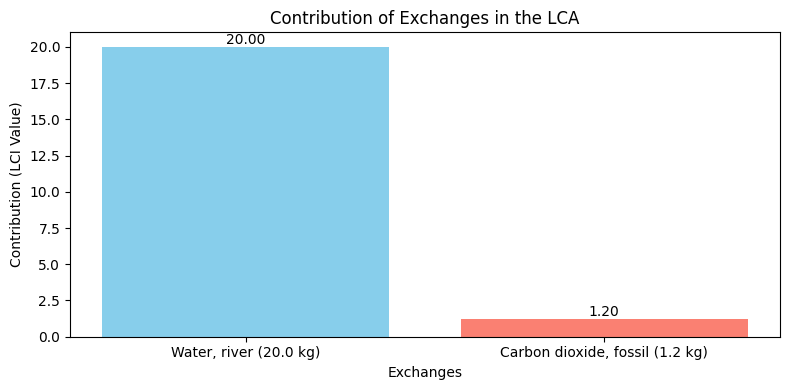

In [59]:
import matplotlib.pyplot as plt

# Configure the figure
plt.figure(figsize=(8, 4))
bars = plt.bar(names, contribuciones, color=['skyblue','salmon'])

# Add axis labels and title
plt.xlabel("Exchanges")
plt.ylabel("Contribution (LCI Value)")
plt.title("Contribution of Exchanges in the LCA")

# Display the value above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.2f}',
        ha='center', va='bottom'
    )

plt.tight_layout()
plt.show()



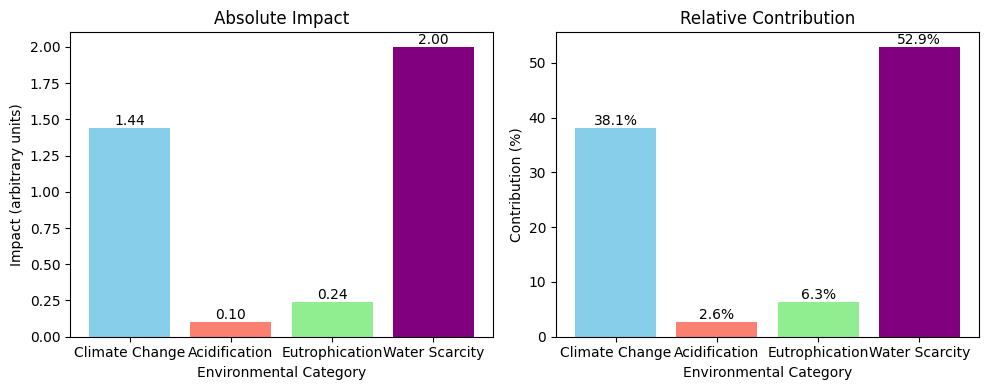

In [58]:
import matplotlib.pyplot as plt

# Define environmental categories to simulate
categories = ["Climate Change", "Acidification", "Eutrophication", "Water Scarcity"]

# Manual mapping of exchanges in the simple model:
# Index 0 -> "Water, river" (20 kg) and Index 1 -> "Carbon dioxide, fossil" (1.2 kg)
manual_mapping = {
    0: "Water, river (20 kg)",
    1: "Carbon dioxide, fossil (1.2 kg)"
}

# Flow values from your model
flow_values = {
    0: 20.0,  # Water
    1: 1.2    # CO₂
}

# Define manual characterization factors for each LCIA category (example values)
# These factors are arbitrary for illustration purposes.
factors = {
    "Climate Change": {0: 0,    1: 1.2},     # Only CO₂ contributes; factor for CO₂ is 1.2
    "Acidification":    {0: 0.002, 1: 0.05},    # Water: 0.002; CO₂: 0.05
    "Eutrophication":     {0: 0,    1: 0.2},     # Only CO₂ influences; factor 0.2
    "Water Scarcity":   {0: 0.1,  1: 0}         # Here only water contributes; factor 0.1
}

# Calculate the total impact for each category by summing (flow_value * factor)
impact_by_category = {}
for category in categories:
    total_impact = 0
    for idx, value in flow_values.items():
        factor = factors[category].get(idx, 0)
        total_impact += value * factor
    impact_by_category[category] = total_impact

# Calculate global impact (sum of all categories)
global_impact = sum(impact_by_category.values())

# Calculate percentage contribution for each category
percentages = {cat: (impact / global_impact * 100) if global_impact != 0 else 0 
               for cat, impact in impact_by_category.items()}

# Create the graphs with two subplots: one for absolute and one for relative values

plt.figure(figsize=(10, 4))

# Subplot for Absolute Impact Values
plt.subplot(1, 2, 1)
plt.bar(impact_by_category.keys(), impact_by_category.values(), 
        color=["skyblue", "salmon", "lightgreen", "purple"])
plt.xlabel("Environmental Category")
plt.ylabel("Impact (arbitrary units)")
plt.title("Absolute Impact")
for i, (cat, imp) in enumerate(impact_by_category.items()):
    plt.text(i, imp, f"{imp:.2f}", ha="center", va="bottom")

# Subplot for Relative Contribution (Percentage)
plt.subplot(1, 2, 2)
plt.bar(percentages.keys(), percentages.values(), 
        color=["skyblue", "salmon", "lightgreen", "purple"])
plt.xlabel("Environmental Category")
plt.ylabel("Contribution (%)")
plt.title("Relative Contribution")
for i, (cat, pct) in enumerate(percentages.items()):
    plt.text(i, pct, f"{pct:.1f}%", ha="center", va="bottom")

plt.tight_layout()
plt.show()

